## Artificial Neural Networks

### MNIST detection with ANN

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
def get_data_loaders(batch_size = 64):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),

    ])

    train_set = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
    test_set = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader

train_loader, test_loader = get_data_loaders()

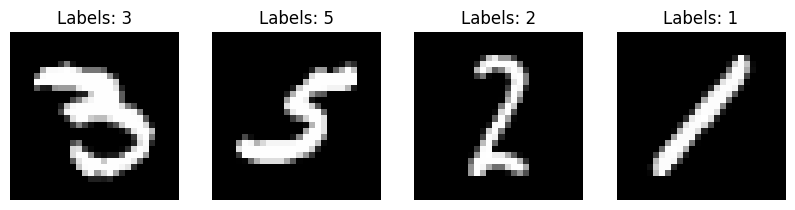

In [7]:
def visualize_samples(loader, n):
    images, labels = next(iter(loader))
    fig, axes = plt.subplots(1, n, figsize=(10, 5))

    for i in range(n):
        axes[i].imshow(images[i].squeeze(), cmap="gray")
        axes[i].set_title(f"Labels: {labels[i].item()}")
        axes[i].axis("off")

    plt.show()

visualize_samples(train_loader, 4)

In [21]:
class NeuralNetworks(nn.Module):
    def __init__(self):
        super(NeuralNetworks, self).__init__()

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(in_features=28*28, out_features=128)

        self.relu = nn.ReLU()

        self.fc2 = nn.Linear(in_features=128, out_features=64)

        self.fc3 = nn.Linear(in_features=64, out_features=10)


    def forward(self, x):

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)

        return x

In [22]:
model = NeuralNetworks().to(device=device)

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters(), lr=1e-3)

In [24]:
model

NeuralNetworks(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [25]:
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    train_loss = []

    for epoch in range(epochs):
        total_loss = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            predictions = model(images)
            loss = criterion(predictions, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        train_loss.append(avg_loss)
        print(f"Epoch: {epoch + 1} / {epochs}, Loss: {avg_loss:.3f}")

    plt.figure()
    plt.plot(range(1, epochs + 1), train_loss, marker = "o", linestyle="-", label="Train Loss")
    plt.xlabel("Epoch")
    plt.ylabel("loss")
    plt.title("Training loss")
    plt.legend()
    plt.show()

Epoch: 1 / 10, Loss: 0.407
Epoch: 2 / 10, Loss: 0.197
Epoch: 3 / 10, Loss: 0.142
Epoch: 4 / 10, Loss: 0.113
Epoch: 5 / 10, Loss: 0.096
Epoch: 6 / 10, Loss: 0.086
Epoch: 7 / 10, Loss: 0.074
Epoch: 8 / 10, Loss: 0.067
Epoch: 9 / 10, Loss: 0.061
Epoch: 10 / 10, Loss: 0.054


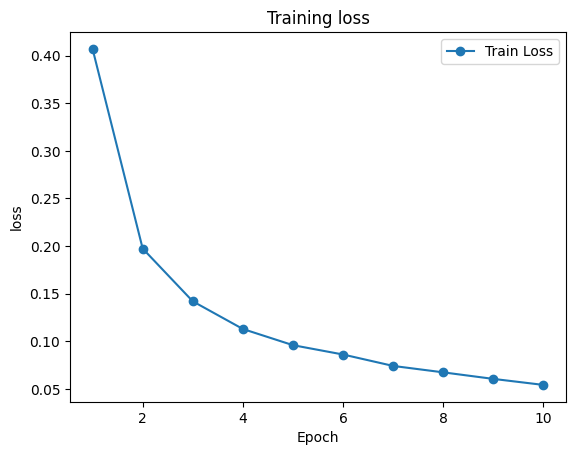

In [26]:
train_model(model=model, train_loader=train_loader, criterion=criterion, optimizer=optimizer)

In [29]:
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            prediction = model(images)
            _, predicted = torch.max(prediction, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Test accuracy: {100*correct/total:.3f}%")

test_model(model=model, test_loader=test_loader)

Test accuracy: 97.420%


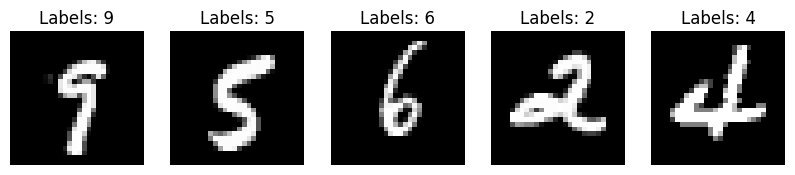

Epoch: 1 / 10, Loss: 0.389
Epoch: 2 / 10, Loss: 0.188
Epoch: 3 / 10, Loss: 0.137
Epoch: 4 / 10, Loss: 0.110
Epoch: 5 / 10, Loss: 0.093
Epoch: 6 / 10, Loss: 0.081
Epoch: 7 / 10, Loss: 0.072
Epoch: 8 / 10, Loss: 0.065
Epoch: 9 / 10, Loss: 0.059
Epoch: 10 / 10, Loss: 0.053


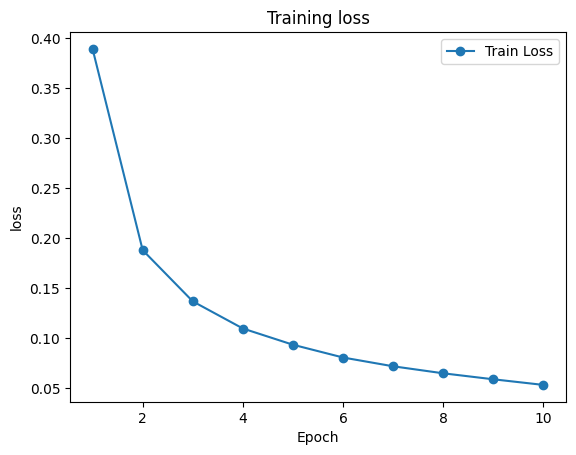

Test accuracy: 96.980%


In [31]:
if __name__ == '__main__':
    train_loader, test_loader = get_data_loaders()
    visualize_samples(train_loader, 5)
    model = NeuralNetworks().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(params=model.parameters(), lr=1e-3)
    train_model(model=model, train_loader=train_loader, criterion=criterion, optimizer=optimizer)
    test_model(model=model, test_loader=test_loader)